In [46]:
import nltk
from nltk.corpus import gutenberg

nltk.download("gutenberg")

for idx, fileid in enumerate(gutenberg.fileids()):
    print(f"#{idx+1} {fileid}")


#1 austen-emma.txt
#2 austen-persuasion.txt
#3 austen-sense.txt
#4 bible-kjv.txt
#5 blake-poems.txt
#6 bryant-stories.txt
#7 burgess-busterbrown.txt
#8 carroll-alice.txt
#9 chesterton-ball.txt
#10 chesterton-brown.txt
#11 chesterton-thursday.txt
#12 edgeworth-parents.txt
#13 melville-moby_dick.txt
#14 milton-paradise.txt
#15 shakespeare-caesar.txt
#16 shakespeare-hamlet.txt
#17 shakespeare-macbeth.txt
#18 whitman-leaves.txt


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [47]:
import re

authors = set()

for fileid in gutenberg.fileids():
    match = re.search(r"^(.+?)-", fileid)
    if match:
        authors.add(match.group(1))

book_data_dict = {}

for index, author in enumerate(authors):
    books = [gutenberg.paras(fileid) for fileid in gutenberg.fileids() if author in fileid]
    para_num = len([paras for book in books for paras in book])
    book_data_dict[author] = para_num

sorted_dict: dict[str, int] = dict(
    sorted(book_data_dict.items(), key=lambda pd: pd[1], reverse=True)
)

for idx, item in enumerate(sorted_dict.items()):
    print(f"#{idx + 1}: {item[0]} - {item[1]} paragraphs")


#1: bible - 24608 paragraphs
#2: austen - 5265 paragraphs
#3: chesterton - 4055 paragraphs
#4: edgeworth - 3726 paragraphs
#5: melville - 2793 paragraphs
#6: whitman - 2478 paragraphs
#7: shakespeare - 2372 paragraphs
#8: bryant - 1194 paragraphs
#9: carroll - 817 paragraphs
#10: blake - 284 paragraphs
#11: burgess - 266 paragraphs
#12: milton - 29 paragraphs


In [48]:
import grammar_analysis as ga

TARGET = "chesterton"
NON_TARGET = "carroll"

nontarget_books = [
    gutenberg.paras(file_id) for file_id in gutenberg.fileids() if NON_TARGET in file_id
]
target_books = [gutenberg.paras(file_id) for file_id in gutenberg.fileids() if TARGET in file_id]

nontarget_paras = [paras for book in nontarget_books for paras in book]
target_paras = [paras for book in target_books for paras in book]

for para in nontarget_paras[:50]:
    print(" ".join(ga.para2sent(para)))
print(f"...\n\nAuthor: {NON_TARGET}, {len(nontarget_paras)} paragraphs")


[ Alice ' s Adventures in Wonderland by Lewis Carroll 1865 ]
CHAPTER I . Down the Rabbit - Hole
Alice was beginning to get very tired of sitting by her sister on the bank , and of having nothing to do : once or twice she had peeped into the book her sister was reading , but it had no pictures or conversations in it , ' and what is the use of a book ,' thought Alice ' without pictures or conversation ?'
So she was considering in her own mind ( as well as she could , for the hot day made her feel very sleepy and stupid ), whether the pleasure of making a daisy - chain would be worth the trouble of getting up and picking the daisies , when suddenly a White Rabbit with pink eyes ran close by her .
There was nothing so VERY remarkable in that ; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself , ' Oh dear ! Oh dear ! I shall be late !' ( when she thought it over afterwards , it occurred to her that she ought to have wondered at this , but at the time it all

In [49]:
for para in target_paras[:50]:
    print(" ".join(ga.para2sent(para)))
print(f"...\n\nAuthor: {TARGET}, {len(target_paras)} paragraphs")


[ The Ball and The Cross by G . K . Chesterton 1909 ]
I . A DISCUSSION SOMEWHAT IN THE AIR
The flying ship of Professor Lucifer sang through the skies like a silver arrow ; the bleak white steel of it , gleaming in the bleak blue emptiness of the evening . That it was far above the earth was no expression for it ; to the two men in it , it seemed to be far above the stars . The professor had himself invented the flying machine , and had also invented nearly everything in it . Every sort of tool or apparatus had , in consequence , to the full , that fantastic and distorted look which belongs to the miracles of science . For the world of science and evolution is far more nameless and elusive and like a dream than the world of poetry and religion ; since in the latter images and ideas remain themselves eternally , while it is the whole idea of evolution that identities melt into each other as they do in a nightmare .
All the tools of Professor Lucifer were the ancient human tools gone mad

In [50]:
from grammar_analysis import FrequencyCalculator

fc = FrequencyCalculator()
all_tags: set[str] = set()

for paras in nontarget_paras + target_paras:
    for para in paras:
        all_tags.update(fc.all_pos_frequency(para).keys())

print(all_tags)

{':', 'DT', "''", 'NNP', 'VBN', 'SYM', 'RBS', '(', 'POS', '$', 'RB', 'CC', '.', 'RBR', 'UH', ')', '``', 'RP', 'JJR', 'IN', 'NNPS', 'PRP', 'JJS', 'WDT', 'NN', 'VBZ', 'VBP', ',', 'FW', 'WRB', 'WP$', 'JJ', 'NNS', 'VB', 'PRP$', 'WP', 'MD', 'EX', 'VBD', 'VBG', 'PDT', 'CD', 'TO', 'LS'}


In [51]:
from grammar_analysis import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator(all_tags)
data = []
correctness = []

for a_para in nontarget_paras:
    x, y = dg.generate_dataset_para(a_para, all_tags, False)
    data.append(x)
    correctness.append(y)

for b_para in target_paras:
    x, y = dg.generate_dataset_para(b_para, all_tags, True)
    data.append(x)
    correctness.append(y)

df = pd.DataFrame(data, columns=dg.columns)
nd_correctness = np.array(correctness)

display(df.head(10))

,word variation,uncommon word frequency,sentence length,average word length,:,DT,'',NNP,VBN,SYM,...,PRP$,WP,MD,EX,VBD,VBG,PDT,CD,TO,LS
0,1.000000,0.750000,12,4.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.0
1,1.000000,0.875000,8,3.375000,0.125000,0.125000,0.000000,0.125000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.707692,0.461538,65,3.769231,0.015385,0.015385,0.015385,0.015385,0.015385,0.0,...,0.030769,0.015385,0.000000,0.000000,0.015385,0.015385,0.000000,0.000000,0.030769,0.0
3,0.822581,0.564516,62,3.790323,0.016129,0.032258,0.000000,0.016129,0.000000,0.0,...,0.032258,0.000000,0.016129,0.000000,0.016129,0.016129,0.000000,0.000000,0.000000,0.0
4,0.620482,0.536145,166,3.572289,0.018072,0.024096,0.006024,0.006024,0.006024,0.0,...,0.018072,0.000000,0.006024,0.006024,0.006024,0.006024,0.000000,0.000000,0.042169,0.0
5,1.000000,0.478261,23,3.869565,0.000000,0.043478,0.000000,0.043478,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.043478,0.0
6,0.863636,0.522727,44,4.113636,0.022727,0.022727,0.000000,0.022727,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.022727,0.022727,0.000000,0.000000,0.022727,0.0
7,0.585987,0.477707,157,3.598726,0.006369,0.006369,0.006369,0.006369,0.006369,0.0,...,0.012739,0.012739,0.000000,0.000000,0.006369,0.006369,0.000000,0.012739,0.057325,0.0
8,0.800000,0.615385,65,3.246154,0.000000,0.030769,0.046154,0.015385,0.000000,0.0,...,0.000000,0.000000,0.015385,0.000000,0.015385,0.015385,0.015385,0.000000,0.015385,0.0
9,0.630303,0.600000,165,3.484848,0.006061,0.012121,0.030303,0.012121,0.006061,0.0,...,0.018182,0.012121,0.006061,0.006061,0.006061,0.006061,0.000000,0.006061,0.036364,0.0


In [52]:
print(df.shape)


(4872, 48)


In [53]:
print(df.dtypes)

word variation             float64
uncommon word frequency    float64
sentence length              int64
average word length        float64
:                          float64
DT                         float64
''                         float64
NNP                        float64
VBN                        float64
SYM                        float64
RBS                        float64
(                          float64
POS                        float64
$                          float64
RB                         float64
CC                         float64
.                          float64
RBR                        float64
UH                         float64
)                          float64
``                         float64
RP                         float64
JJR                        float64
IN                         float64
NNPS                       float64
PRP                        float64
JJS                        float64
WDT                        float64
NN                  

In [54]:
print(df.isna().sum())


word variation             0
uncommon word frequency    0
sentence length            0
average word length        0
:                          0
DT                         0
''                         0
NNP                        0
VBN                        0
SYM                        0
RBS                        0
(                          0
POS                        0
$                          0
RB                         0
CC                         0
.                          0
RBR                        0
UH                         0
)                          0
``                         0
RP                         0
JJR                        0
IN                         0
NNPS                       0
PRP                        0
JJS                        0
WDT                        0
NN                         0
VBZ                        0
VBP                        0
,                          0
FW                         0
WRB                        0
WP$           

In [55]:
import sklearn
import lightgbm as lgb

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, nd_correctness)

model = lgb.LGBMClassifier()
model.fit(X_train.values, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

val = sklearn.metrics.roc_auc_score(y_test, y_pred_prob)
print(f"auc-rocスコア: {val}")

auc-rocスコア: 0.9429023088525352


In [56]:
display(pd.crosstab(y_test, y_pred))

col_0,False,True
row_0,,
False,141,63
True,29,985


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


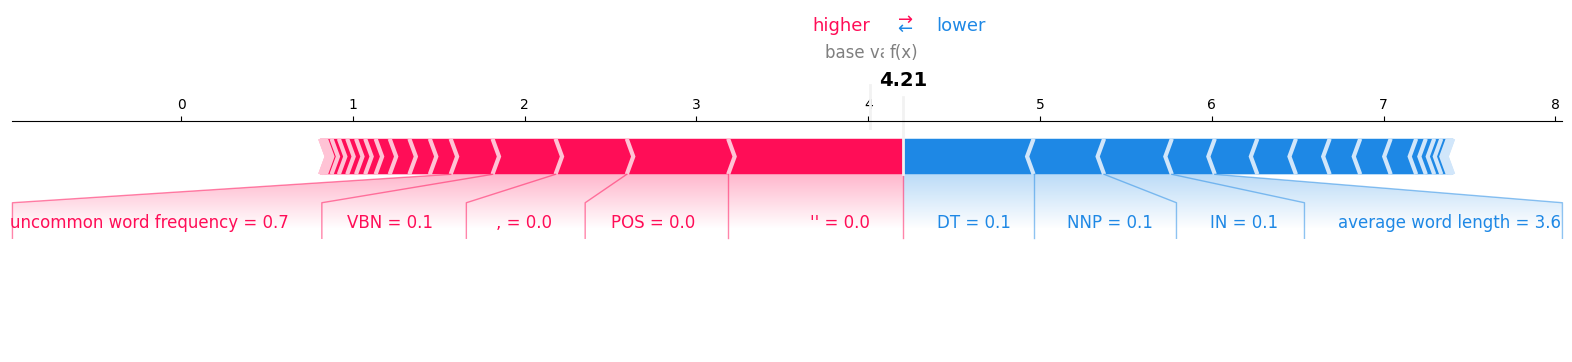

In [57]:
import shap

exp = shap.TreeExplainer(model)
sv_test = exp.shap_values(X_test)[1]

# shap.initjs()
shap.force_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0], matplotlib=True)

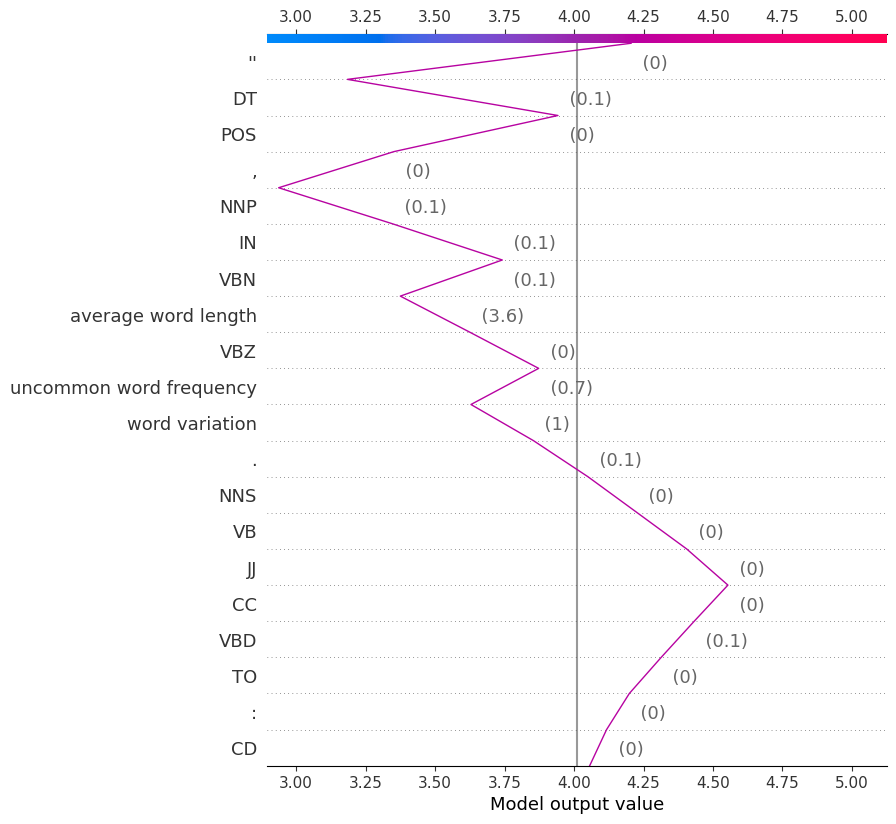

In [58]:
shap.decision_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


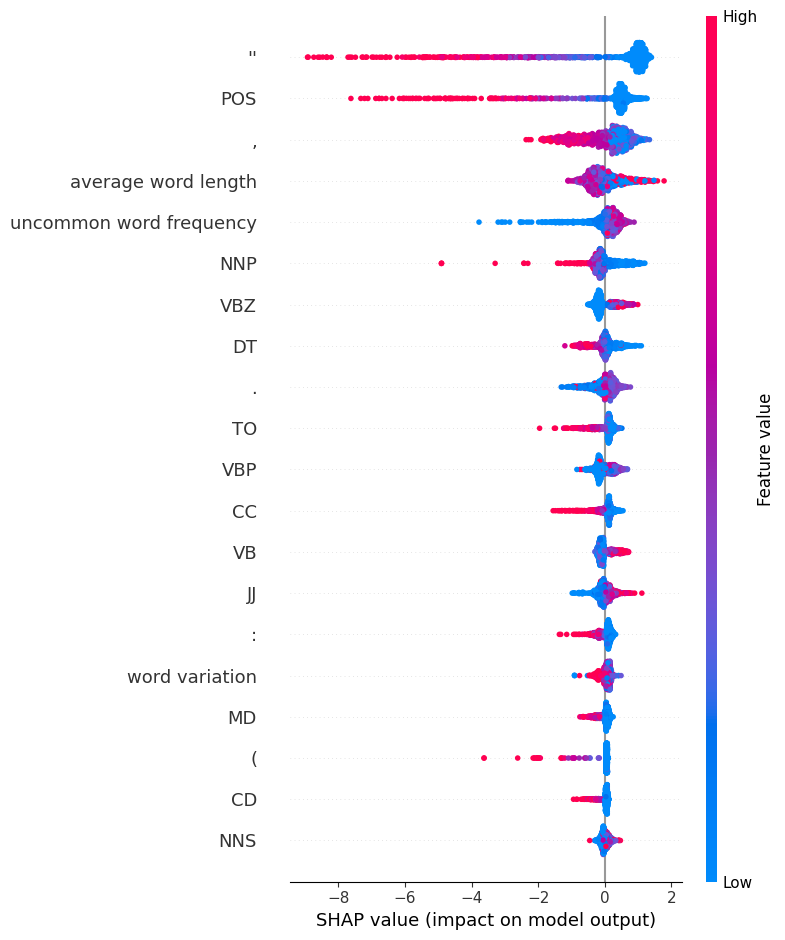

In [59]:
shap.summary_plot(sv_test, X_test)

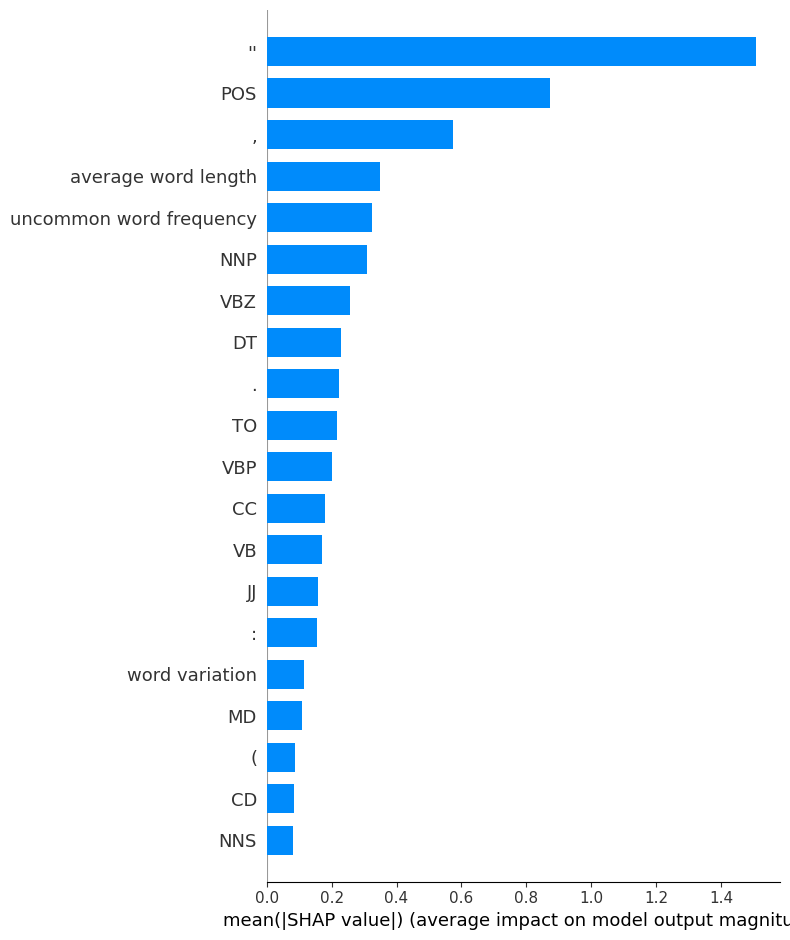

In [60]:
shap.summary_plot(sv_test, X_test, plot_type="bar")